# Assignment 8A - Breast Cancer

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 1 - Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.
1. Name: Breast cancer data (restricted access)
2. Nature of data: This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal. 
3. Instances: 286 total
4. Missing values: Yes
5. Features:
    - age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
    - menopause: lt40, ge40, premeno. 
    - tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
    - inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
    - node-caps: yes, no. 
    - deg-malig: 1, 2, 3. 
    - breast: left, right. 
    - breast-quad: left-up, left-low, right-up, right-low, central. 
    - irradiat: yes, no.
6. Other interesting information: This data is old (more than 30 years) and there has definitely been a lot more data that has come about in the time since, but this is a good starting point. It is interesting to see the range of data in this file, but also the differneces/similarities (as shown below).

#### Question 2 - Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.
1. Yes, there is missing data values
2. There are 10 features, of which they are all categorical. 

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data',
                           names = ["Class", "Age", "Menopause", "Tumor-Size", "Inv-Nodes", "Node-Caps", 
                                    "Deg-Malig", "Breast", "Breast-Quad", "Irradiat"], sep= ',', header= None)
# a summary of the data
data

Class    Age Menopause Tumor-Size Inv-Nodes Node-Caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     Deg-Malig Breast Breast-Quad Irradiat  
0            3   left    left_low       no  
1            2  right    right_up       no  
2            2   left    left_low       no  
3            2  right     left_up       no  
4            2  right   right_low       no  
..         ...    ...         ...      ...  
281          2   left     left_up       no  
282          3   left     left_up      yes  
283          1  right     left_up       no  
284          3   left    left_low       no  
285          3   left    left_low       no  

[286 rows x 10 columns]

In [3]:
len(data)

286

In [4]:
# the rows, columns of the data
data.shape

(286, 10)

In [5]:
# a description of what the data contains
data.describe(include="all")

Class    Age Menopause Tumor-Size Inv-Nodes Node-Caps  \
count                    286    286       286        286       286       286   
unique                     2      6         3         11         7         3   
top     no-recurrence-events  50-59   premeno      30-34       0-2        no   
freq                     201     96       150         60       213       222   
mean                     NaN    NaN       NaN        NaN       NaN       NaN   
std                      NaN    NaN       NaN        NaN       NaN       NaN   
min                      NaN    NaN       NaN        NaN       NaN       NaN   
25%                      NaN    NaN       NaN        NaN       NaN       NaN   
50%                      NaN    NaN       NaN        NaN       NaN       NaN   
75%                      NaN    NaN       NaN        NaN       NaN       NaN   
max                      NaN    NaN       NaN        NaN       NaN       NaN   

         Deg-Malig Breast Breast-Quad Irradiat  
count   286.000000    286         286      286  
unique         NaN      2           6        2  
top            NaN   left    left_low       no  
freq           NaN    152         110      218  
mean      2.048951    NaN         NaN      NaN  
std       0.738217    NaN         NaN      NaN  
min       1.000000    NaN         NaN      NaN  
25%       2.000000    NaN         NaN      NaN  
50%       2.000000    NaN         NaN      NaN  
75%       3.000000    NaN         NaN      NaN  
max       3.000000    NaN         NaN      NaN

In [6]:
# the only numerical data
data.var()

Deg-Malig    0.544964
dtype: float64

In [7]:
# the first five rows of data
data.head()

Class    Age Menopause Tumor-Size Inv-Nodes Node-Caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   Deg-Malig Breast Breast-Quad Irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no

In [8]:
# the data types of the data
data.dtypes

Class          object
Age            object
Menopause      object
Tumor-Size     object
Inv-Nodes      object
Node-Caps      object
Deg-Malig       int64
Breast         object
Breast-Quad    object
Irradiat       object
dtype: object

In [9]:
data["Class"] =  data["Class"].astype('category')

In [10]:
# verify that the data contains what it says it does
data["Class"].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

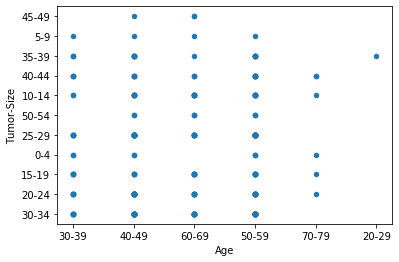

In [11]:
# a scatter plot to see Age vs Tumor Size
ax = data.plot(kind="scatter", x="Age", y="Tumor-Size")

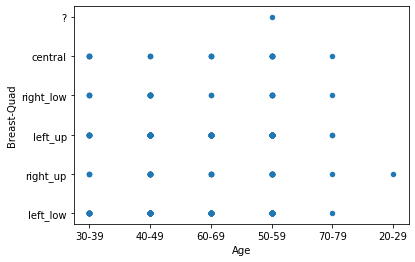

In [12]:
# a scatter pliot to see Age vs Breast Quadrant
ax = data.plot(kind="scatter", x="Age", y="Breast-Quad")

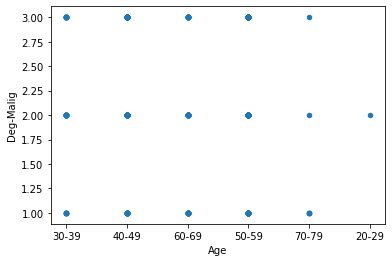

In [13]:
# a scatter plot of Age vs Degree of Malignancy
ax = data.plot(kind="scatter", x="Age", y="Deg-Malig")

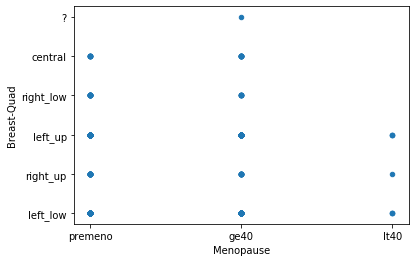

In [14]:
# a scatter plot of Menopause vs Breast Quadrant
ax = data.plot(kind="scatter", x="Menopause", y="Breast-Quad")

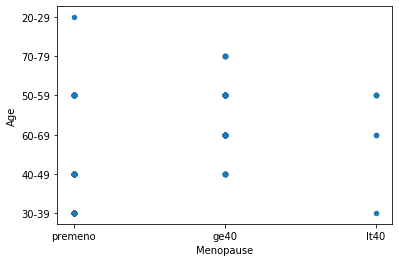

In [15]:
# a scatter plot of Menopause vs Age
ax = data.plot(kind="scatter", x="Menopause", y="Age")

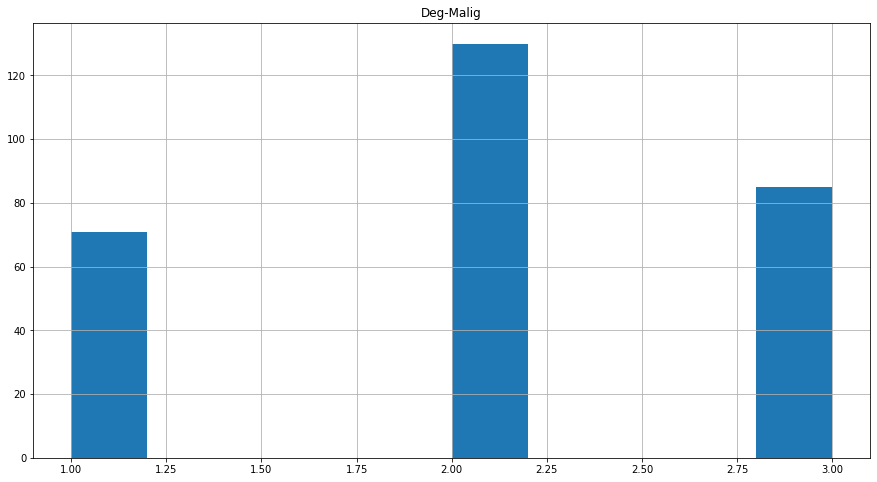

In [16]:
# since there is only one numerical feature (Deg-Malig), this histogram only represents that data/value
plt_hist = data.hist(figsize=(15,8))

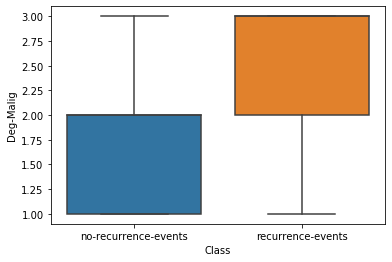

In [17]:
# a boxplot of the Degree of Malignancy in each class
ax = sns.boxplot(x="Class", y="Deg-Malig", data=data)

In [18]:
# the number of data rows for each age group
age_data = data.groupby(['Class','Age'])

In [19]:
age_size = age_data.agg({'Age': np.size})
age_size

Age
Class                Age        
no-recurrence-events 20-29   1.0
                     30-39  21.0
                     40-49  63.0
                     50-59  71.0
                     60-69  40.0
                     70-79   5.0
recurrence-events    20-29   NaN
                     30-39  15.0
                     40-49  27.0
                     50-59  25.0
                     60-69  17.0
                     70-79   1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e7eb10>]],
      dtype=object)

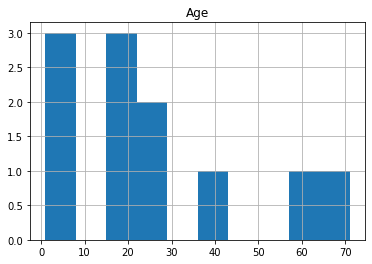

In [20]:
age_size.hist()

In [21]:
counted_data = data.set_index(["Age", "Class"]).count(level="Age")
counted_data

Menopause  Tumor-Size  Inv-Nodes  Node-Caps  Deg-Malig  Breast  \
Age                                                                     
20-29          1           1          1          1          1       1   
30-39         36          36         36         36         36      36   
40-49         90          90         90         90         90      90   
50-59         96          96         96         96         96      96   
60-69         57          57         57         57         57      57   
70-79          6           6          6          6          6       6   

       Breast-Quad  Irradiat  
Age                           
20-29            1         1  
30-39           36        36  
40-49           90        90  
50-59           96        96  
60-69           57        57  
70-79            6         6

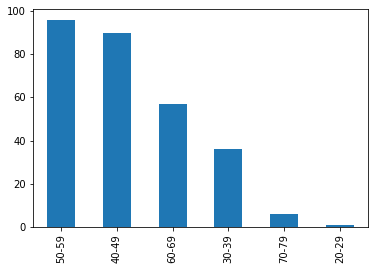

In [22]:
ax = data['Age'].value_counts(sort=True).plot.bar()

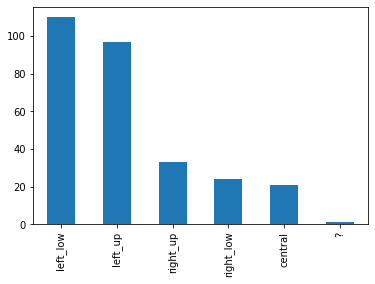

In [23]:
ax = data['Breast-Quad'].value_counts(sort=True).plot.bar()

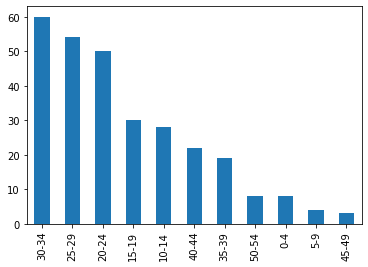

In [24]:
ax = data['Tumor-Size'].value_counts(sort=True).plot.bar()

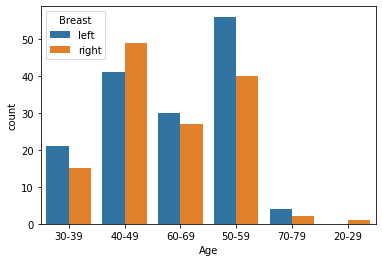

In [25]:
ax = sns.countplot(x="Age", hue="Breast", data=data)

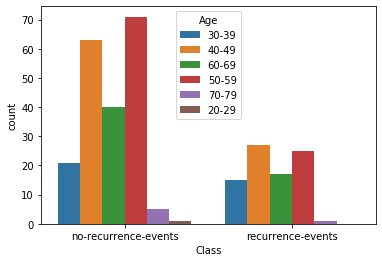

In [26]:
ax = sns.countplot(x="Class", hue="Age", data=data)

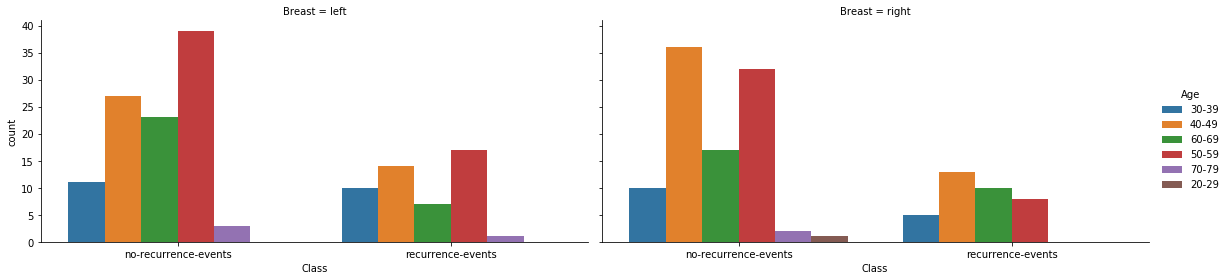

In [27]:
ax = sns.catplot(x="Class", hue="Age", col="Breast",
...                 data=data, kind="count",
...                 height=4, aspect=2);

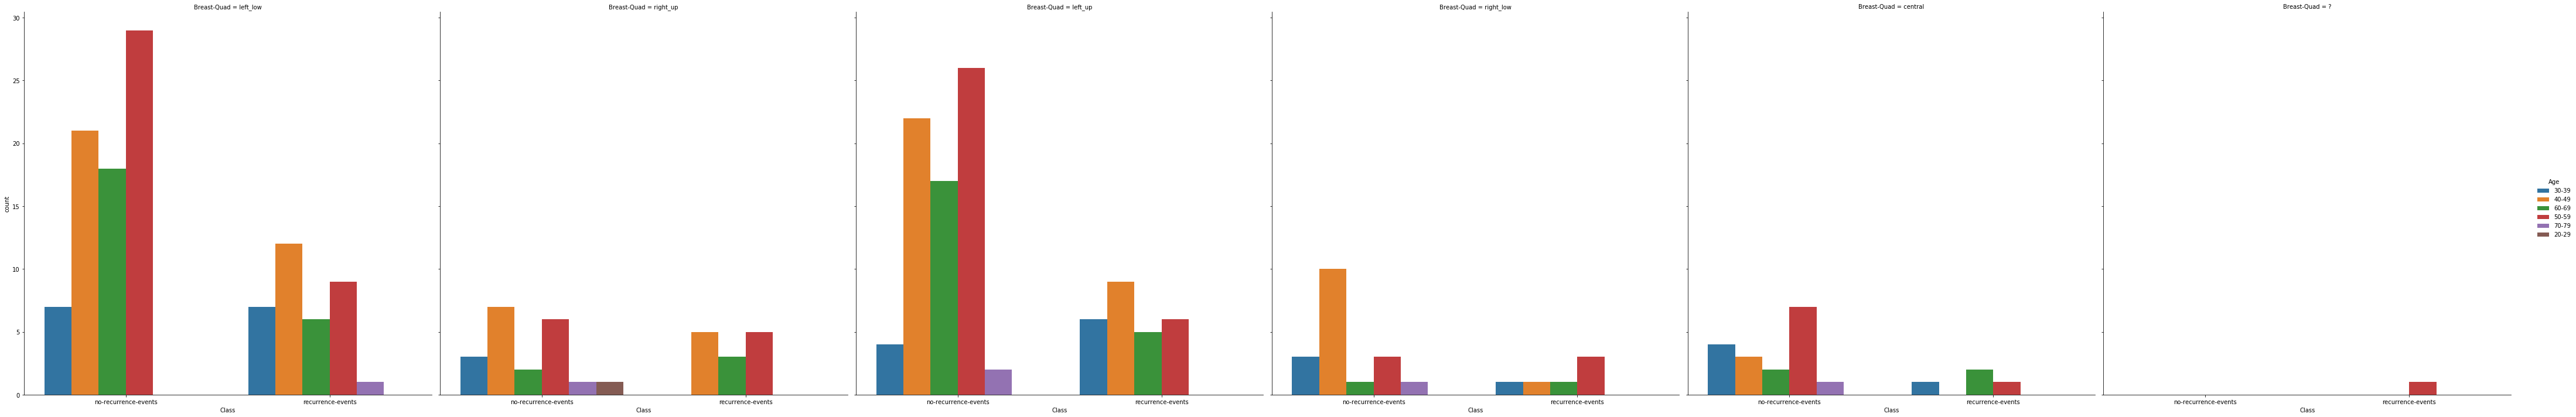

In [28]:
ax = sns.catplot(x="Class", hue="Age", col="Breast-Quad",
...                 data=data, kind="count",
...                 height=10, aspect=1);

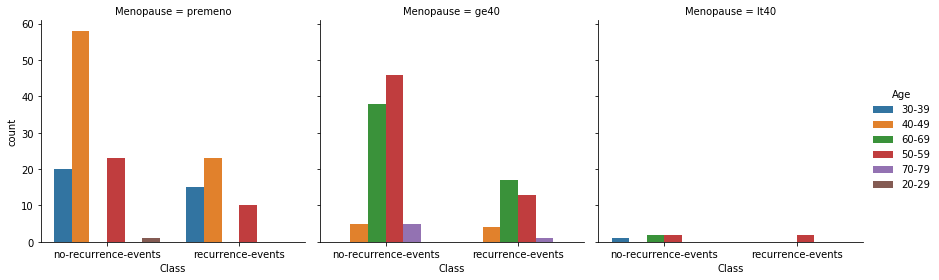

In [29]:
ax = sns.catplot(x="Class", hue="Age", col="Menopause",
...                 data=data, kind="count",
...                 height=4, aspect=1);

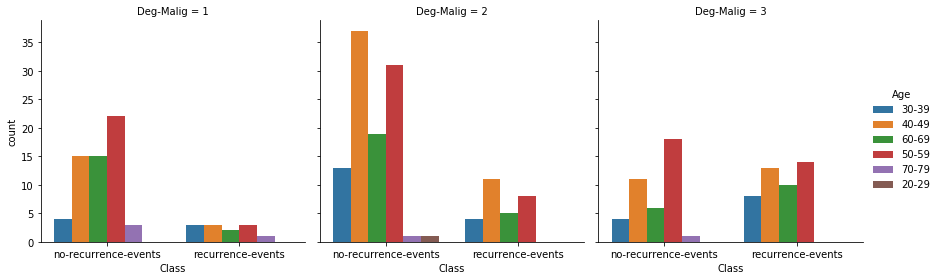

In [30]:
ax = sns.catplot(x="Class", hue="Age", col="Deg-Malig",
...                 data=data, kind="count",
...                 height=4, aspect=1);

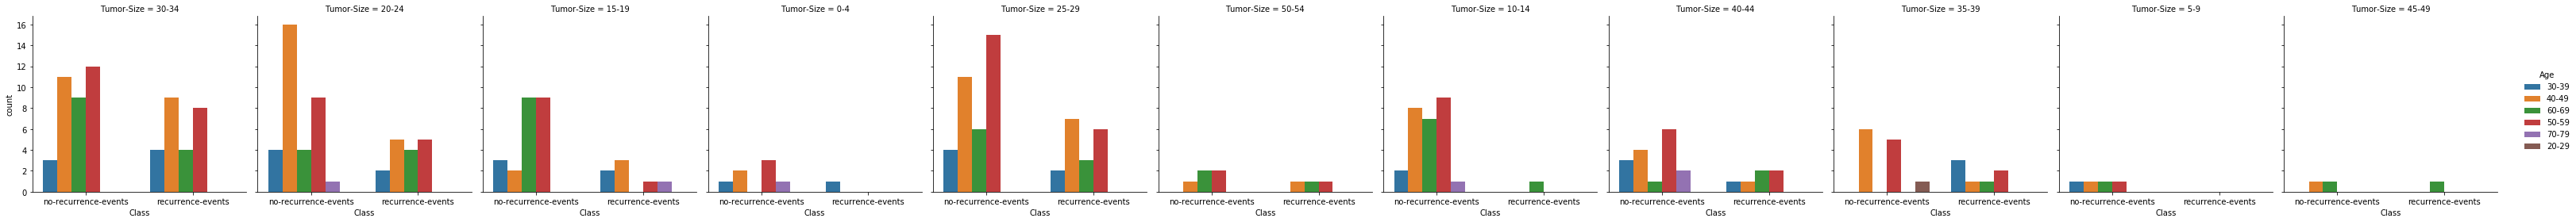

In [31]:
ax = sns.catplot(x="Class", hue="Age", col="Tumor-Size",
...                 data=data, kind="count",
...                 height=4, aspect=1);

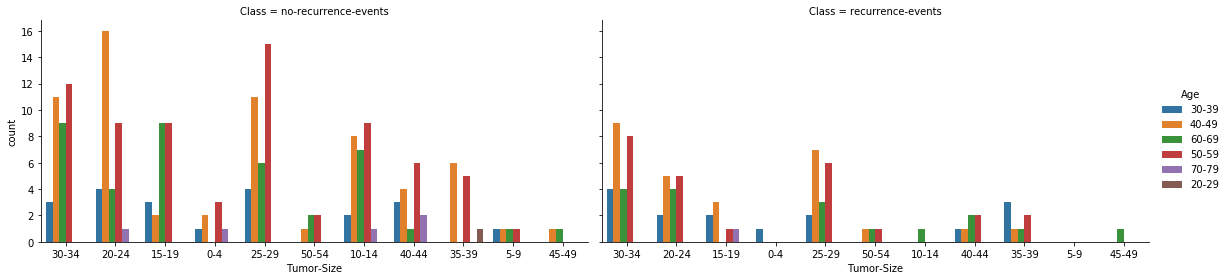

In [32]:
ax = sns.catplot(x="Tumor-Size", hue="Age", col="Class",
...                 data=data, kind="count",
...                 height=4, aspect=2);

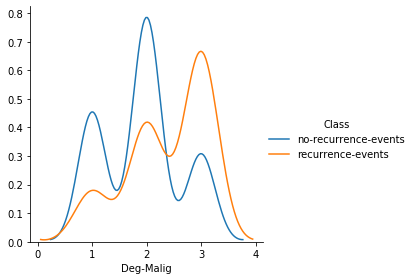

In [33]:
ax = sns.FacetGrid(data, hue="Class", height=4) \
   .map(sns.kdeplot, "Deg-Malig") \
   .add_legend()

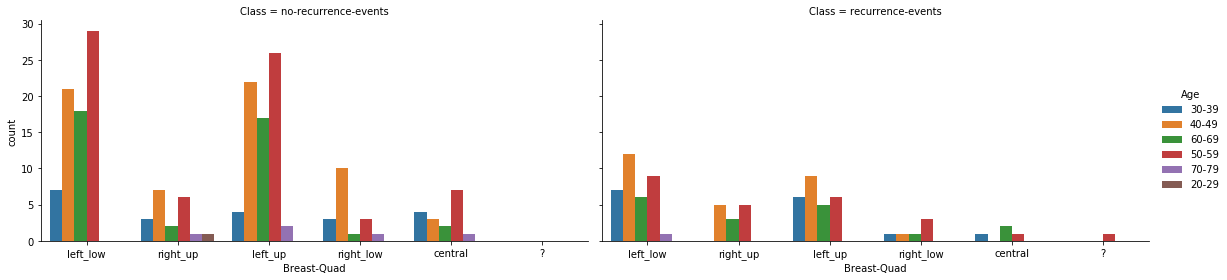

In [34]:
ax = sns.catplot(x="Breast-Quad", hue="Age", col="Class",
...                 data=data, kind="count",
...                 height=4, aspect=2);

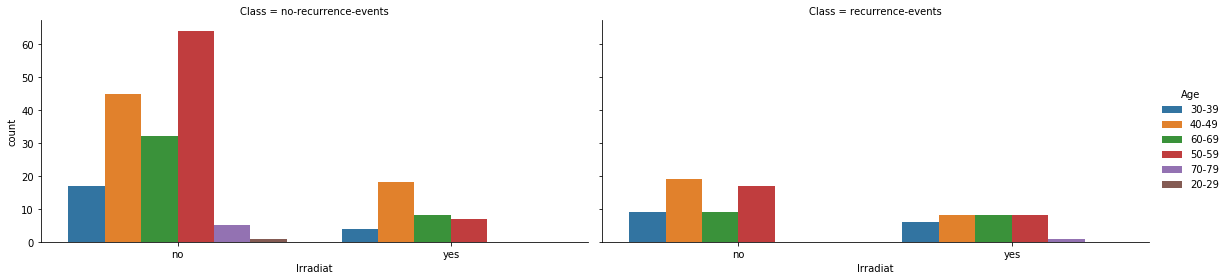

In [35]:
ax = sns.catplot(x="Irradiat", hue="Age", col="Class",
...                 data=data, kind="count",
...                 height=4, aspect=2);

The above are a variety of seaborn countplots used to illistrate the data. Because the data is categorical instead of numerical, in order to visualize the data, the number of occurences had to be counted. I counted by age at first, but then realized that the seaborn library had a built in countplot and catplot that will count and graph.

#### Question 3 - Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [36]:
# in order to manipulate the data within a DecisionTreeClassifier model, it is necessary 
# to change the data from strings to numbers
age_range = data.Age.unique()
age_range.sort()
age_groups = {
    '20-29': 20, 
    '30-39': 30, 
    '40-49': 40, 
    '50-59': 50, 
    '60-69': 60, 
    '70-79': 70
}
data['age_mod'] = [age_groups[x] for x in data['Age']]
del data['Age']

meno_range = data.Menopause.unique()
meno_range.sort()
meno_groups = {
    'premeno': 0,
    'ge40': 1,
    'lt40': 2
}
data['meno_mod'] = [meno_groups[x] for x in data['Menopause']]
del data['Menopause']

tumor_range = data['Tumor-Size'].unique()
tumor_range.sort()
tumor_groups = {
    '0-4': 0, 
    '5-9': 5, 
    '10-14': 10, 
    '15-19': 15, 
    '20-24': 20, 
    '25-29': 25,
    '30-34': 30, 
    '35-39': 35, 
    '40-44': 40, 
    '45-49': 45, 
    '50-54': 50
}
data['tumor_mod'] = [tumor_groups[x] for x in data["Tumor-Size"]]
del data['Tumor-Size']

inv_range = data['Inv-Nodes'].unique()
inv_range.sort()
inv_groups = {
    '0-2': 0,
    '3-5': 1,
    '6-8': 2,
    '9-11': 3,
    '12-14': 4,
    '15-17': 5,
    '18-20': 6,
    '21-23': 7,
    '24-26': 8
}
data['inv_mod'] = [inv_groups[x] for x in data['Inv-Nodes']]
del data['Inv-Nodes']

node_range = data['Node-Caps'].unique()
node_range.sort()
node_groups = {
    'no': 0,
    'yes': 1,
    '?': 2
}
data['node_mod'] = [node_groups[x] for x in data['Node-Caps']]
del data['Node-Caps']

breast_range = data['Breast'].unique()
breast_range.sort()
breast_groups = {
    'left': 0,
    'right': 1
}
data['breast_mod'] = [breast_groups[x] for x in data['Breast']]
del data['Breast']

irradiat_range = data['Irradiat'].unique()
irradiat_range.sort()
irradiat_groups = {
    'no': 0,
    'yes': 1
}
data['irradiat_mod'] = [irradiat_groups[x] for x in data['Irradiat']]
del data['Irradiat']

data[:10]

Class  Deg-Malig Breast-Quad  age_mod  meno_mod  tumor_mod  \
0  no-recurrence-events          3    left_low       30         0         30   
1  no-recurrence-events          2    right_up       40         0         20   
2  no-recurrence-events          2    left_low       40         0         20   
3  no-recurrence-events          2     left_up       60         1         15   
4  no-recurrence-events          2   right_low       40         0          0   
5  no-recurrence-events          2    left_low       60         1         15   
6  no-recurrence-events          2    left_low       50         0         25   
7  no-recurrence-events          1    left_low       60         1         20   
8  no-recurrence-events          2    left_low       40         0         50   
9  no-recurrence-events          2     left_up       40         0         20   

   inv_mod  node_mod  breast_mod  irradiat_mod  
0        0         0           0             0  
1        0         0           1             0  
2        0         0           0             0  
3        0         0           1             0  
4        0         0           1             0  
5        0         0           0             0  
6        0         0           0             0  
7        0         0           0             0  
8        0         0           0             0  
9        0         0           1             0

In [37]:
del data['Breast-Quad']
data[:10]

Class  Deg-Malig  age_mod  meno_mod  tumor_mod  inv_mod  \
0  no-recurrence-events          3       30         0         30        0   
1  no-recurrence-events          2       40         0         20        0   
2  no-recurrence-events          2       40         0         20        0   
3  no-recurrence-events          2       60         1         15        0   
4  no-recurrence-events          2       40         0          0        0   
5  no-recurrence-events          2       60         1         15        0   
6  no-recurrence-events          2       50         0         25        0   
7  no-recurrence-events          1       60         1         20        0   
8  no-recurrence-events          2       40         0         50        0   
9  no-recurrence-events          2       40         0         20        0   

   node_mod  breast_mod  irradiat_mod  
0         0           0             0  
1         0           1             0  
2         0           0             0  
3         0           1             0  
4         0           1             0  
5         0           0             0  
6         0           0             0  
7         0           0             0  
8         0           0             0  
9         0           1             0

In [38]:
X = data.values[:, 1:9]
Y = data.values[:,0]

In [39]:
X

array([[3, 30, 0, ..., 0, 0, 0],
       [2, 40, 0, ..., 0, 1, 0],
       [2, 40, 0, ..., 0, 0, 0],
       ...,
       [1, 60, 1, ..., 0, 1, 0],
       [3, 40, 1, ..., 0, 0, 0],
       [3, 50, 1, ..., 0, 0, 0]], dtype=object)

In [40]:
Y

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no

In [41]:
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [42]:
# import DTC
from sklearn.tree import DecisionTreeClassifier

# gini is default
clf_gini = DecisionTreeClassifier(random_state = 100, max_depth=3)
clf = clf_gini.fit(X_train, y_train)

In [43]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [44]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
    

In [45]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
    

In [46]:
from sklearn.metrics import accuracy_score
print ("DTC gini accuracy is ", accuracy_score(y_test,y_pred)*100)

DTC gini accuracy is  73.25581395348837


In [47]:
print("DTC entropy accuracy is ", accuracy_score(y_test,y_pred_en)*100)

DTC entropy accuracy is  72.09302325581395


#### Question 4 - The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [48]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# above link used as a reference on how DTC functions
# pip install graphviz
# pip install pydotplus

In [49]:
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["Deg_malig", "age_mod", "meno_mod", "tumor_mod", "inv_mod", 
                                    "node_mod", "breast_mod", "irradiat_mod"]

dot_data = tree.export_graphviz(clf, feature_names=data_feature_names, out_file=None,
                                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

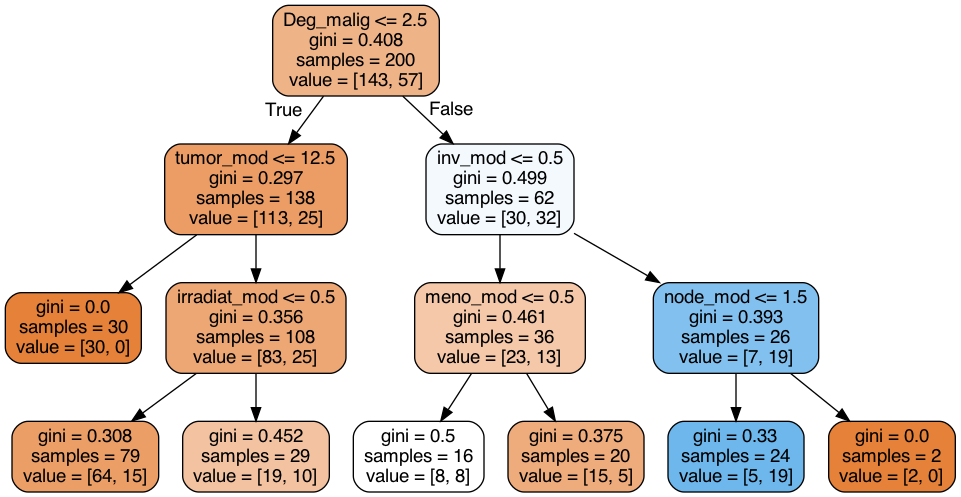

In [50]:
from IPython.core.display import Image
Image(filename='tree.png',width=2500, height=1500)

#### Question 5 - Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [51]:
# predict using model
clf.predict([[1, 50, 1, 30, 0, 0, 1, 0]])

array(['no-recurrence-events'], dtype=object)

In [52]:
# new gini DTC
clf_gini_new = DecisionTreeClassifier(random_state = 100)
clf = clf_gini_new.fit(X_train, y_train)

In [53]:
# new entropy DTC
clf_entropy_new = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [54]:
y_pred_new = clf_gini_new.predict(X_test)
y_pred_new

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events

In [55]:
y_pred_en_new = clf_entropy_new.predict(X_test)
y_pred_en_new

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrenc

In [56]:
print ("DTC gini accuracy is ", accuracy_score(y_test,y_pred_new)*100)

DTC gini accuracy is  69.76744186046511


In [57]:
print ("DTC entropy accuracy is ", accuracy_score(y_test,y_pred_en_new)*100)

DTC entropy accuracy is  67.44186046511628


In [58]:
data_feature_names = ["Deg_malig", "age_mod", "meno_mod", "tumor_mod", "inv_mod", 
                                    "node_mod", "breast_mod", "irradiat_mod"]
class_name = ["Class"]
dot_data = tree.export_graphviz(clf_gini_new, feature_names=data_feature_names,
                                out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('new_tree.png')

True

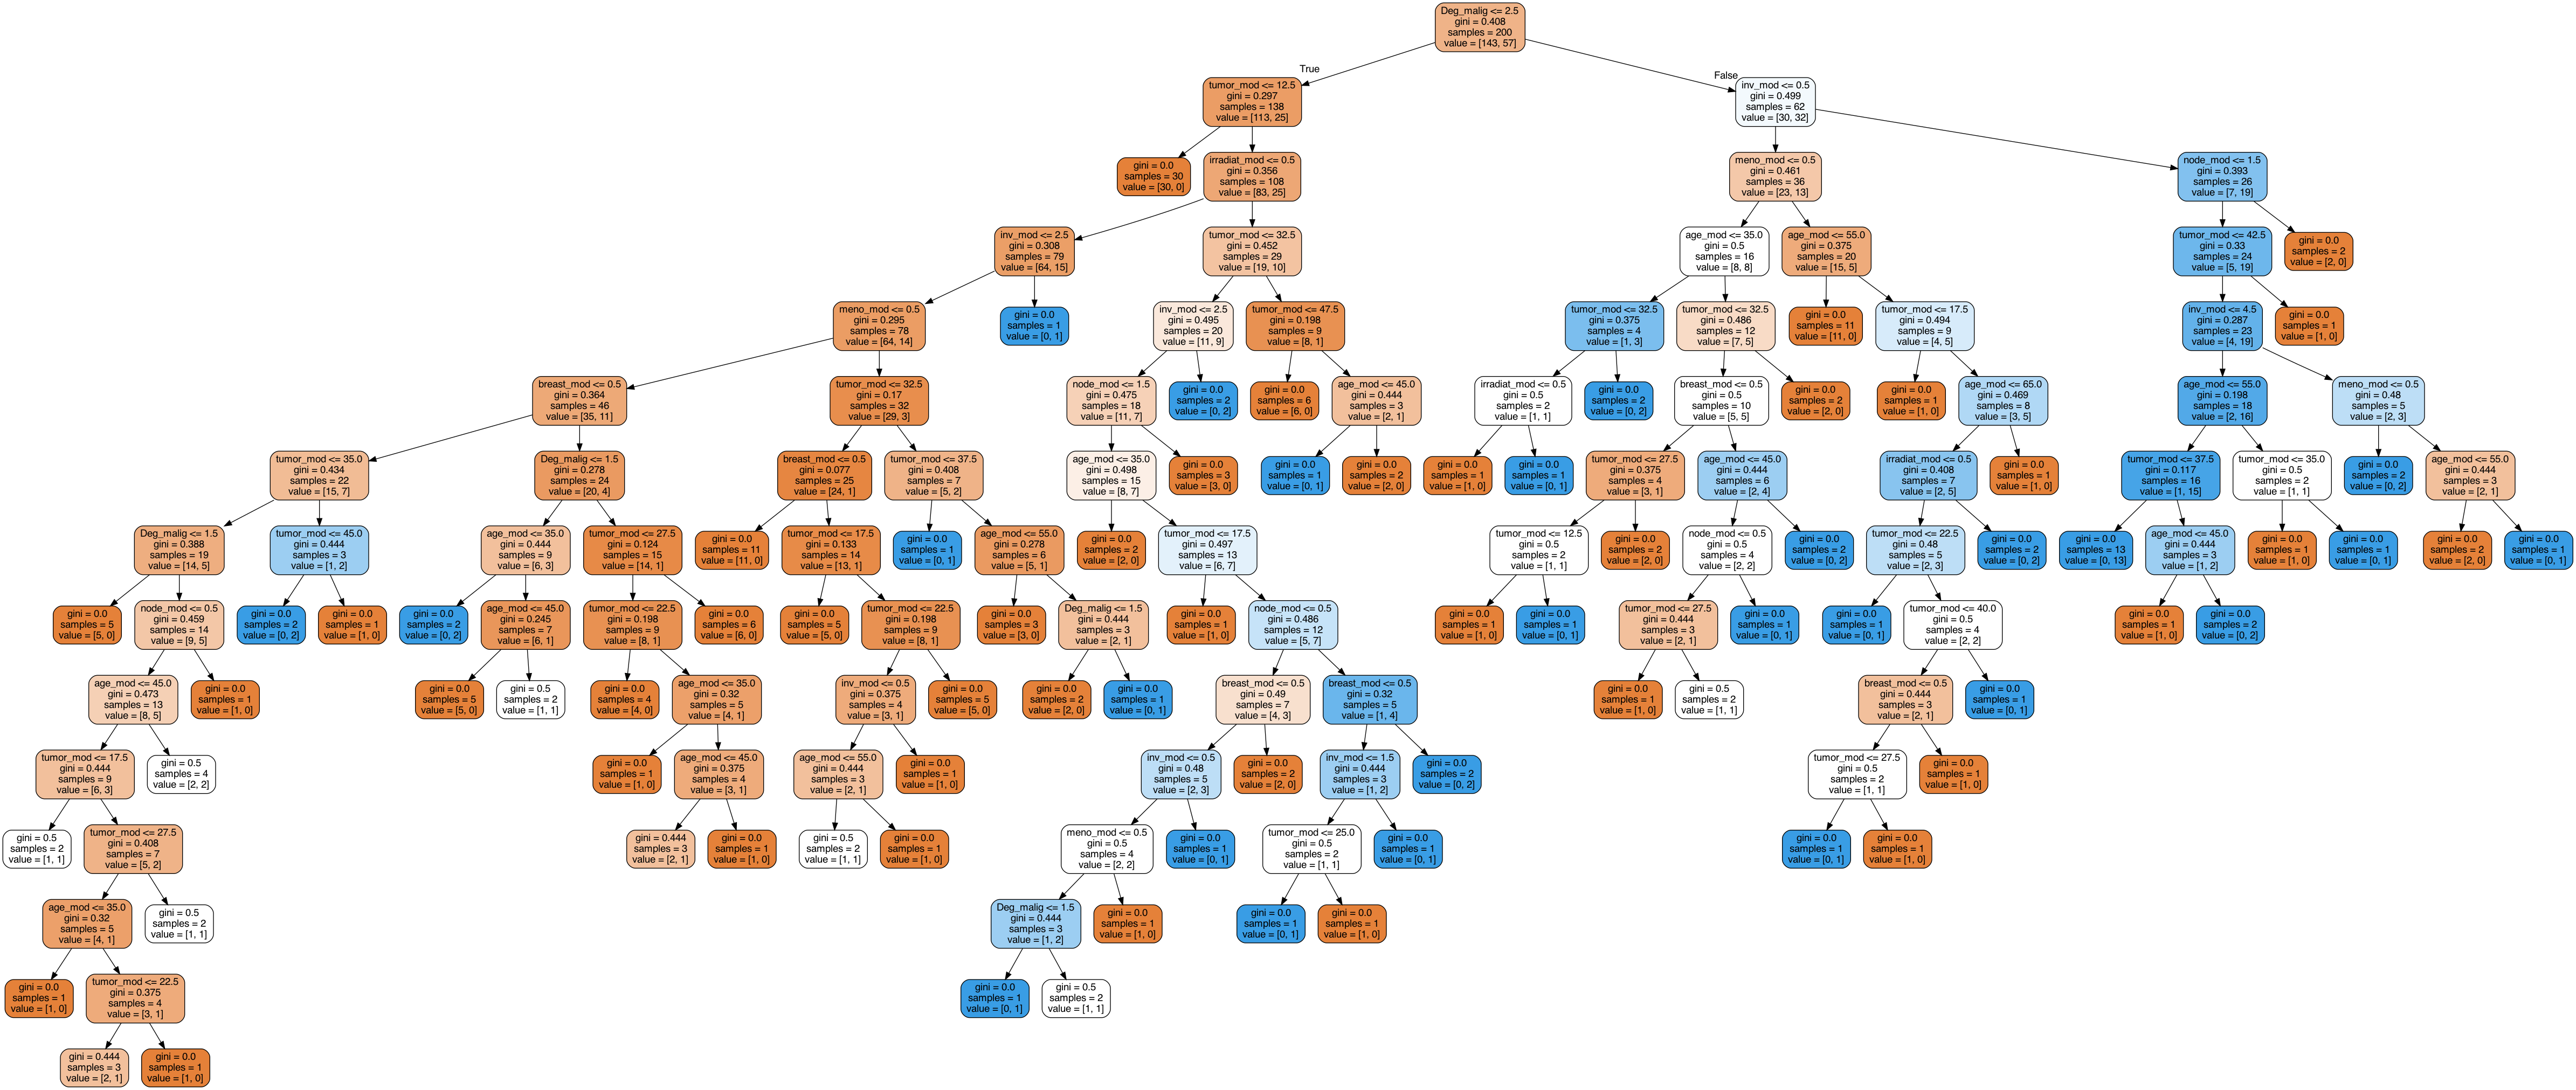

In [59]:
Image(filename='new_tree.png',width=2500, height=1500)

In [60]:
# prediction
clf_gini_new.predict([[3, 30, 0, 20, 0, 0, 0, 1]])

array(['recurrence-events'], dtype=object)

In [61]:
# another DTC prediction
clf_gini_new.predict([[1, 50, 1, 30, 0, 0, 1, 0]])

array(['no-recurrence-events'], dtype=object)

The two above predictions:
1. first one: recurrence
    - deg malig: 3
    - age_mod: 30 (30-39)
    - meno mod: 0 (pre-meno)
    - tumor_mod: 20 (20-24)
    - inv_mod: 0 (0-2)
    - node mod: 0 (no)
    - breast_mod: 0 (left)
    - irradiat_mod: 1 (yes)
2. second one: non-recurrence
    - deg malig: 1
    - age_mod: 50 (50-59)
    - meno mod: 1 (ge40)
    - tumor_mod: 30 (30-34)
    - inv_mod: 0 (0-2)
    - node_mod: 0 (no)
    - breast_mod: 1 (right)
    - irradiat_mod: 0 (no)

This model takes these characteristics into account and predicts whether the breast cancer will be a non-recurring event or a recurring event. There are 8 factors that it takes into consideration and makes the prediction based on the data that was given. 

#### Tuning the parameters

In [62]:
# trying RSCV to compare results
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# the parameters to sample
param = {"max_depth": [3, None], "max_features": randint(1, 5), "min_samples_leaf": randint(1, 9),
         "criterion": ["gini", "entropy"]}

# create a DTC
dtc = DecisionTreeClassifier()
# create a RSCV
rscv = RandomizedSearchCV(dtc, param, cv=5)
# Fit to data
rscv.fit(X_train, y_train)

# Print tuned parameters and score
print("The tuned paramaters: {}".format(rscv.best_params_))
print("The best score is {}".format(rscv.best_score_*100))

The tuned paramaters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 5}
The best score is 75.50000000000001
